We are an animal NGO and we want to encourage pet adoption. To do this, we will show a video of animals to people. However, we do not know what is more effective: a video of dogs or a video of cats.

Therefore, we decided to run an experiment: we will create 2 videos, one of a dog and one of a cat. Then, we will ask people the probability that they will adopt an animal.

*The participants in this experiment will only see one video each.

*At the end of the video, we will ask them the probability that they will adopt an animal.

*The samples are random and without systematic biases.

Objective: To evaluate which animal (dog or cat) should be featured in an adoption campaign video.

Experiment: 500 people who do not have pets will watch the adoption campaign videos. The videos are identical except for the animals shown:

250 people will be randomized to the cat video.
250 people will be randomized to the dog video.

Response: "What is the chance of adopting a pet? (0-100)" after the video.

Is the average probability of those who watch the cat video equal to those who watch the dog video?



In [ ]:
# Loading the libraries
import pandas as pd
import math
import seaborn as sns
from matplotlib import pyplot as plt

##Dataframe descriptive analysis



In [ ]:
#reading csv file
df= pd.read_csv("/cachorro_gato.csv")
df

,Unnamed: 0,grupo,escore
0,0,1,59.853433
1,1,0,66.353529
2,2,1,56.495813
3,3,0,67.995090
4,4,1,70.434375
...,...,...,...
495,495,0,70.292458
496,496,0,74.674293
497,497,1,43.148814
498,498,0,58.625388


The 'Group' column indicates whether the person watched the dog video or the cat video, with 0 representing the dog video and 1 representing the cat video. The 'Score' column indicates the probability of the person adopting a pet after watching the video, which ranges from 0 to 100.


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
grupo,0
escore,0


Using this function, we can see that there are no missing values.

In [ ]:
# Grouped Descriptive Statistics: Here are the main statistics grouped by the "Group" column
df.groupby('grupo').describe()

Unnamed: 0                                                           \
           count        mean         std  min    25%    50%    75%    max   
grupo                                                                       
0          253.0  247.470356  147.772334  1.0  117.0  256.0  366.0  499.0   
1          247.0  251.578947  141.301675  0.0  131.5  240.0  377.5  497.0   

      escore                                                         \
       count       mean        std        min        25%        50%   
grupo                                                                 
0      253.0  55.531922  14.665402  16.304739  44.488055  55.802372   
1      247.0  56.744495  14.913287  14.654955  48.682432  56.924405   

                             
             75%        max  
grupo                        
0      66.249013  95.309459  
1      66.817326  93.259671

The table above shows the count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum of the adoption probability scores for each group. According to the data above, we can observe that the mean and median scores of those who watched the cat video are slightly higher than those who watched the dog video.


##Histogram by group
showing the distribution of each group.

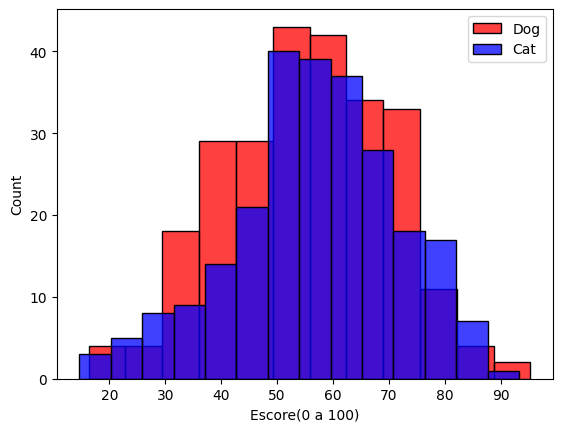

In [ ]:
#histogram group that watched the dog video
sns.histplot(df[df['grupo']==0]['escore'], label='Dog', color= "red")
#histogram group that watched the cat video
sns.histplot(df[df['grupo'] == 1]['escore'], label = 'Cat', color="blue")
plt.xlabel('Escore(0 a 100)')
plt.legend()
plt.show()

Based on the histogram constructed above, it is observed that both distributions approximate a normal distribution. Given that we have two independent samples and the population standard deviations for both groups are unknown, the t-test for comparing means is the best option.

In [ ]:
from scipy.stats import ttest_ind

ttest_ind(df[df['grupo']==0]['escore'], df[df['grupo']==1]['escore'], equal_var=False)

TtestResult(statistic=-0.9164816309140925, pvalue=0.3598586668688969, df=497.17217443366343)

Since the question does not specify whether the variances are equal, we will assume they are not. Therefore, we set "equal_var=False" in our t-test to account for the possibility of unequal variances.


In [ ]:
t, pvalue = ttest_ind(df[df['grupo']==0]['escore'], df[df['grupo']==1]['escore'], equal_var=False)

In [ ]:
print(f"stat={t:.3f}, p={pvalue:.3f}")

stat=-0.916, p=0.360


Our p-value here was approximately 0.36.

Since the significance level is set at 5% and p > 0.05, we do not have enough evidence to reject the null hypothesis. Thus, at a 95% confidence level, we conclude that the means are statistically equa, which means that the average probability of someone watching the cat video is the same as that of someone watching the dog video.

